# Week 16
Implement Auto encoders for image denoising on MNIST dataset

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_flat = x_train_noisy.reshape((-1, 28 * 28))
x_test_flat = x_test_noisy.reshape((-1, 28 * 28))

In [10]:
input_img = Input(shape=(28 * 28,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28 * 28, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
autoencoder.fit(
    x_train_flat, x_train.reshape((-1, 28 * 28)),
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test.reshape((-1, 28 * 28)))
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3395 - val_loss: 0.2040
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1920 - val_loss: 0.1713
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1690 - val_loss: 0.1616
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1599 - val_loss: 0.1534
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1527 - val_loss: 0.1474
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1474 - val_loss: 0.1431
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1432 - val_loss: 0.1396
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1398 - val_loss: 0.1366
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1365 - val_loss: 0.1341
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1339 - val_loss: 0.1327
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1320 - val_loss: 0.1305
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [12]:
decoded_images = autoencoder.predict(x_test_flat)
decoded_images = decoded_images.reshape((-1, 28, 28))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


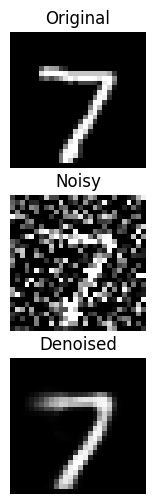

In [14]:
n = 1
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i], cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()